In [1]:
!pip install -q pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!mkdir -p data
!curl -L -o data/E0.csv https://www.football-data.co.uk/mmz4281/2324/E0.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  168k  100  168k    0     0   205k      0 --:--:-- --:--:-- --:--:--  205k


In [6]:
df = pd.read_csv('data/E0.csv',
                 usecols=['HomeTeam','AwayTeam','FTHG','FTAG','FTR']).dropna()


df['HomeCS'] = df['FTAG'] == 0          # home conceded 0
df['AwayCS'] = df['FTHG'] == 0          # away conceded 0


result_to_points = {
    'H': (3,0),
    'D': (1,1),
    'A': (0,3)
}

home_pts, away_pts = zip(*df['FTR'].map(result_to_points))
df['HomePts'] = home_pts
df['AwayPts'] = away_pts

In [7]:
def summarise(side):
    cs_col  = f'{side}CS'
    pts_col = f'{side}Pts'

    cs_games     = df[df[cs_col]]
    nocs_games   = df[~df[cs_col]]

    return pd.DataFrame({
        'Games'          : [cs_games.shape[0], nocs_games.shape[0]],
        'Avg points'     : [cs_games[pts_col].mean(),
                            nocs_games[pts_col].mean()],
        'Win rate (%)'   : [100*cs_games[pts_col].eq(3).mean(),
                            100*nocs_games[pts_col].eq(3).mean()]
    }, index=[f'{side} clean-sheet', f'{side} no clean-sheet'])

home_summary = summarise('Home')
away_summary = summarise('Away')
summary = pd.concat([home_summary, away_summary])
summary

,Games,Avg points,Win rate (%)
Home clean-sheet,89,2.752809,87.640449
Home no clean-sheet,291,1.243986,33.333333
Away clean-sheet,68,2.676471,83.823529
Away no clean-sheet,312,0.862179,21.153846


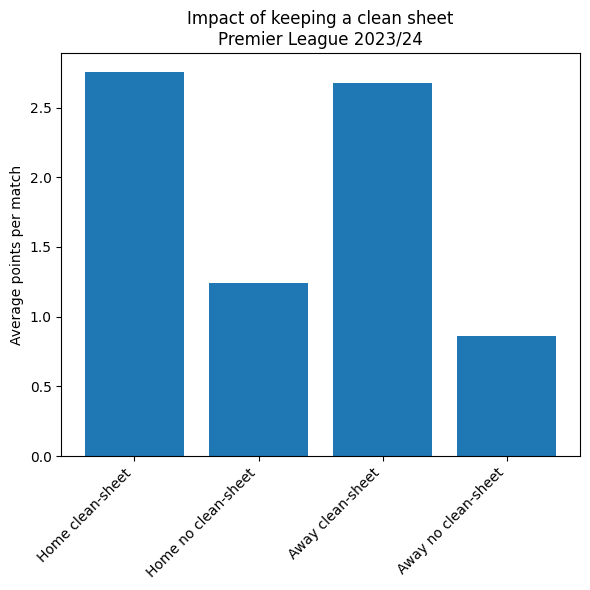

In [8]:
plt.figure(figsize=(6,6))
plt.bar(summary.index, summary['Avg points'])
plt.ylabel('Average points per match')
plt.title('Impact of keeping a clean sheet\nPremier League 2023/24')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('clean_sheet_points.png', dpi=300)
plt.show()